<a href="https://colab.research.google.com/github/imams12/Diabetes-KNN/blob/main/Diabetes_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN (K-Nearest Neighbors)
K-nearest neighbors atau knn adalah algoritma yang berfungsi untuk melakukan klasifikasi suatu data berdasarkan data pembelajaran (train data sets), yang diambil dari k tetangga terdekatnya (nearest neighbors).

## Connect Gdrive kedalam Colab

In [ ]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Import Packages

In [ ]:
# Import library
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

## Import Data 
Langkah pertama dalam membaca file adalah memastikan dimana file anda tersimpan. Buatlah path yang merepresentasikan letak data anda tersimpan.

In [ ]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = "gdrive/MyDrive/DATA/Diabetes/" #silahkan masukkan path sesuai dengan letak data di drive 

In [ ]:
os.listdir(path)

['diabetes.csv']

Langkah kedua adalah membaca data menampilkannya dalam bentuk dataframe.

In [ ]:
# Membaca file csv
df = pd.read_csv(path + 'diabetes.csv')

In [ ]:
# Menampilkan 5 urutan teratas dari data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Penjelasan mengenai atribut
*   Pregnancies: Berapa kali hamil
*   Glucose: Konsentrasi glukosa plasma selama 2 jam dalam tes toleransi glukosa oral
*   BloodPressure: Tekanan darah diastolik (mm Hg)
*   SkinThickness: Ketebalan lipatan kulit trisep (mm)
*   Insulin: Mengukur jumlah insulin selama 2 jam (mu U/ml)
*   BMI: Indeks massa tubuh (berat dalam kg/(tinggi dalam m)^2)
*   DiabetesPedigreeFunction: Relasi silsilah diabetes
*   Age: Umur (tahun)
*   Outcome: Hasil (0 or 1)

## Exploratory Data Analysis (EDA)
Secara garis besar EDA adalah suatu proses dalam menganalis data yang anda miliki, contohnya melihat pola data, informasi data, menemukan anomali dari data, dan beberapa analisis statistik lainnya.

In [ ]:
# Mencari ukuran data
df.shape

(768, 9)

Dari data diatas maka diketahui bahwa data tersebut terdiri dari 768 baris dan 9 kolom.

In [ ]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari data diatas maka diketahui bahwa atribut-atribut bertipe integer dan float.

In [ ]:
# Menganalisis data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Berdasarkan output diatas diketahui bahwa pada kolom 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', dan 'BMI' terdapat data missing value.

## Pre-Processing Data
Dalam tahap ini kita akan mencoba untuk cleaning dan manipulate data.

In [ ]:
X=df.drop('Outcome', axis=1)
Y=df['Outcome']

In [ ]:
# Memanipulate missing value
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    X[col].replace(0, X[col].median(), inplace=True)

In [ ]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=101)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
709,2,93,64,32,160.0,38.0,0.674,23
425,4,184,78,39,277.0,37.0,0.264,31
135,2,125,60,20,140.0,33.8,0.088,31
630,7,114,64,23,30.5,27.4,0.732,34
500,2,117,90,19,71.0,25.2,0.313,21
...,...,...,...,...,...,...,...,...
75,1,117,48,20,30.5,24.7,0.140,22
599,1,109,38,18,120.0,23.1,0.407,26
575,1,119,44,47,63.0,35.5,0.280,25
337,5,115,76,23,30.5,31.2,0.343,44


In [ ]:
Y_train

709    1
425    1
135    0
630    1
500    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 614, dtype: int64

## Standard Scaler


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [ ]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [ ]:
X_train_std

array([[-0.5288778 , -0.94207104, -0.6869385 , ...,  0.77640068,
         0.62083528, -0.86196915],
       [ 0.07415093,  2.06732107,  0.46749421, ...,  0.63248822,
        -0.64915711, -0.19012014],
       [-0.5288778 ,  0.11617673, -1.01677641, ...,  0.17196836,
        -1.19432458, -0.19012014],
       ...,
       [-0.83039216, -0.08224472, -2.33612808, ...,  0.41661953,
        -0.59959643, -0.6940069 ],
       [ 0.37566529, -0.2145257 ,  0.30257526, ..., -0.20220404,
        -0.40445126,  0.9016345 ],
       [ 1.58172274,  0.28152795, -0.19218162, ...,  0.22953334,
         0.55268935,  0.98561563]])

In [ ]:
X_test_std

array([[-0.83039216,  0.14924698, -1.01677641, ..., -0.36050774,
        -0.38586601,  1.15357788],
       [-0.22736344,  2.16653179, -0.19218162, ...,  0.54614075,
        -0.203111  ,  0.22978549],
       [ 0.97869401, -0.51215788,  1.62192693, ..., -1.42545993,
        -0.73898584,  1.23755901],
       ...,
       [ 0.67717965,  0.41380892, -0.19218162, ...,  0.40222829,
         0.21195968, -0.35808239],
       [ 1.8832371 , -1.76882711,  2.77635964, ...,  0.41661953,
        -0.58410872,  1.15357788],
       [ 3.08929455, -0.71057934,  0.46749421, ...,  0.57492324,
        -0.19072083,  1.06959676]])

## Error Rate

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std, Y_train)
    pred_i = knn.predict(X_test_std)
    error.append(np.mean(pred_i != Y_test))

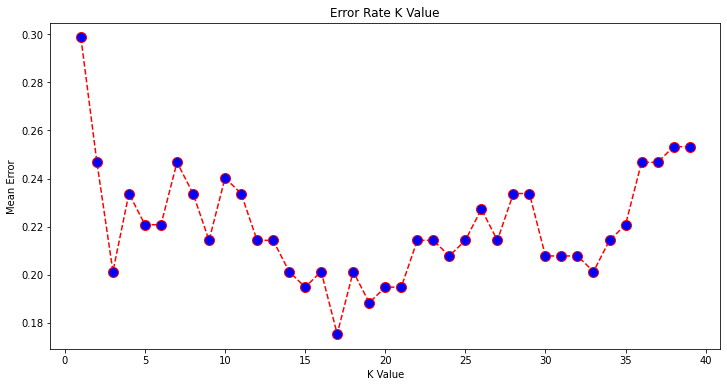

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

## Training Model

In [ ]:
# Create classifier objet
knn = KNeighborsClassifier(n_neighbors = 17)

# Train the classifier using train data
knn.fit(X_train_std, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [ ]:
Y_predict=knn.predict(X_test_std)

In [ ]:
Y_predict

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

## Hasil Training Model

In [ ]:
# Evaluasi Model menggunakan Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_predict)

array([[93, 10],
       [17, 34]])

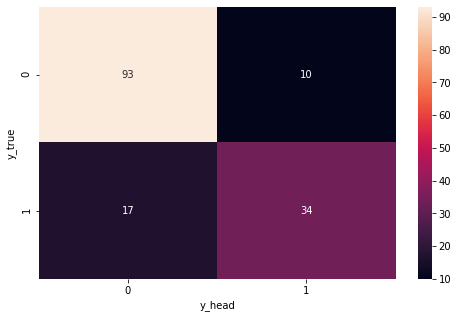

In [ ]:
# Visualisasi Model Confusion Matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, Y_predict), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

Jika dilihat dari confusion matrix diatas dari 110 pasien positif diabetes, model memprediksi ada 17 pasien yang diprediksi negatif diabetes (FN), dan dari 44 pasien negatif diabetes, model memprediksi ada 10 pasien yang diprediksi positif diabetes (FP)

## Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print (accuracy_score(Y_test, Y_predict)*100)

82.46753246753246
